In [1]:
                                          #### “Bankruptcy Prevention – Exploratory Data Analysis (EDA)” ####
# Ignore warnings for clean output
import warnings
warnings.filterwarnings("ignore") 

In [2]:
##Instal Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Load dataset 
df = pd.read_excel("Bankruptcy (2).xlsx") 
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [3]:
#To Show All Columns
df.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

In [4]:
#To Show Shape Of The Data Sheet 
print("Shape:", df.shape)

Shape: (250, 7)


In [5]:
#To Display to Top 5 Row 
display(df.head(5))

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [6]:
#To Show Type of The Data
print(df.dtypes)

industrial_risk          float64
management_risk          float64
financial_flexibility    float64
credibility              float64
competitiveness          float64
operating_risk           float64
class                     object
dtype: object


In [7]:
#To Show Missing values per column:
print(df.isnull().sum())

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64


In [8]:
#To Add feature list
features = [
    'industrial_risk', 'management_risk', 'financial_flexibility',
    'credibility', 'competitiveness', 'operating_risk'
]

In [9]:
# To Show Target encoding (bankruptcy:-1 , non-bankruptcy:-0)
df['class_encoded'] = df['class'].map({'bankruptcy': 1, 'non-bankruptcy': 0})

In [10]:
#To Show Target distribution Of Class
print(df['class'].value_counts())

class
non-bankruptcy    143
bankruptcy        107
Name: count, dtype: int64


In [11]:
#To Show Target distribution in Classin Percentage:
print((df['class'].value_counts(normalize=True)*100).round(2))

class
non-bankruptcy    57.2
bankruptcy        42.8
Name: proportion, dtype: float64


In [12]:
# Tho Display Numeric Summary Statistics
display(df[features].describe().T)

,count,mean,std,min,25%,50%,75%,max
industrial_risk,250.0,0.518,0.411526,0.0,0.0,0.5,1.0,1.0
management_risk,250.0,0.614,0.410705,0.0,0.5,0.5,1.0,1.0
financial_flexibility,250.0,0.376,0.401583,0.0,0.0,0.5,0.5,1.0
credibility,250.0,0.470,0.415682,0.0,0.0,0.5,1.0,1.0
competitiveness,250.0,0.476,0.440682,0.0,0.0,0.5,1.0,1.0
operating_risk,250.0,0.570,0.434575,0.0,0.0,0.5,1.0,1.0


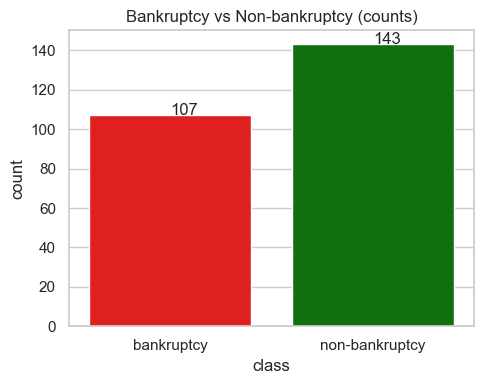

In [13]:
# To Show Visualizations of Bankruptcy vs Non-bankruptcy In Bar Chat
palette = {'bankruptcy': 'red', 'non-bankruptcy': 'green'}
sns.set_theme(style="whitegrid")
plt.figure(figsize=(5,4))
ax = sns.countplot(x='class',data=df,palette=palette)
plt.title('Bankruptcy vs Non-bankruptcy (counts)')
for p in ax.patches: ax.text(p.get_x()+p.get_width()/2,p.get_height(),int(p.get_height()))
plt.tight_layout()
plt.show()

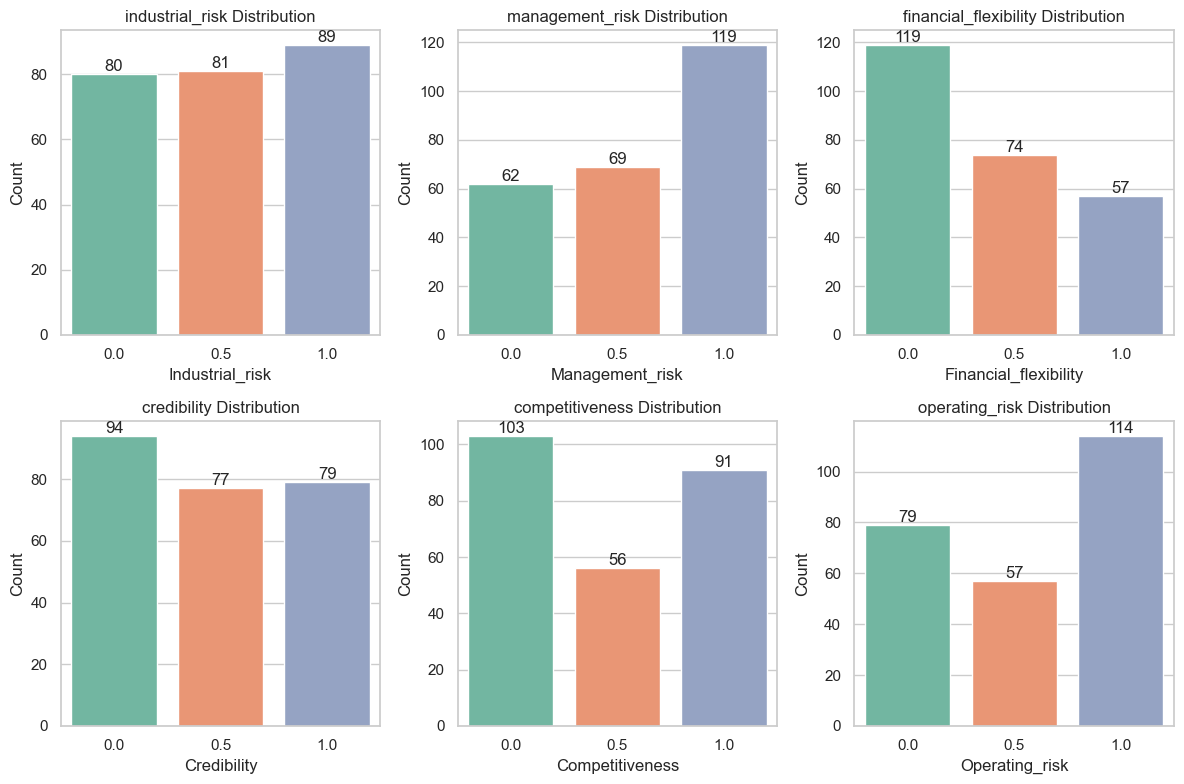

In [14]:
#It will show a 2×3 grid of bar plots, each plot showing how many companies have each value (0, 0.5, 1) for each feature.
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for ax, col in zip(axes.flat, features):
    sns.countplot(x=col, data=df, ax=ax, palette="Set2")
    ax.set_title(f"{col} Distribution")
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel("Count")
    # Add counts on top of each bar
    for p in ax.patches:
        ax.text(p.get_x()+p.get_width()/2, p.get_height(), int(p.get_height()), ha='center', va='bottom')
plt.tight_layout()
plt.show()

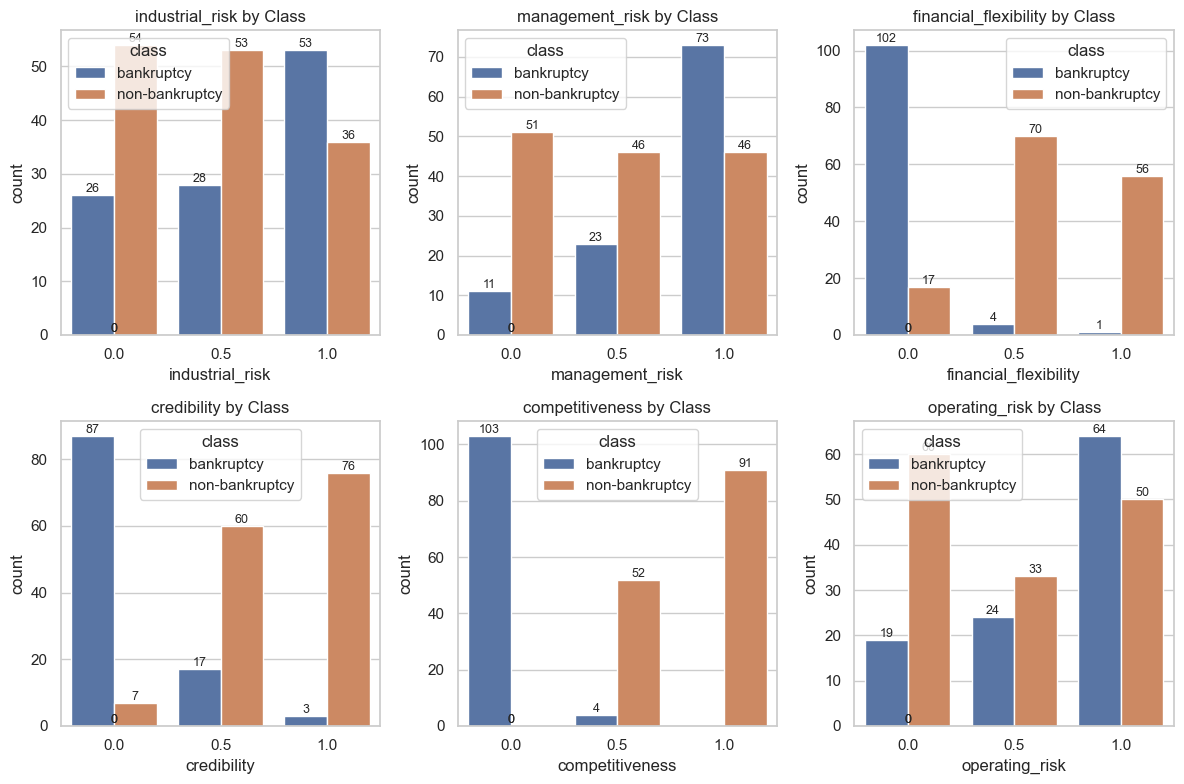

In [15]:
# This graph shows how each feature (industrial_risk, management_risk, etc.) is distributed 
# across the two classes ('bankruptcy' vs 'non-bankruptcy'), highlighting patterns or differences between them.
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for ax, col in zip(axes.flat, features):
    sns.countplot(x=col, hue='class', data=df, ax=ax)
    ax.set_title(f"{col} by Class")
    # Add counts on top of each bar
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2,p.get_y() + p.get_height(),int(p.get_height()),ha='center', va='bottom', fontsize=9)                                                                  
plt.tight_layout()
plt.show()

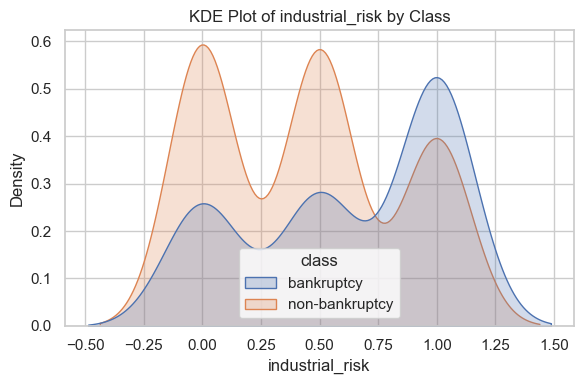

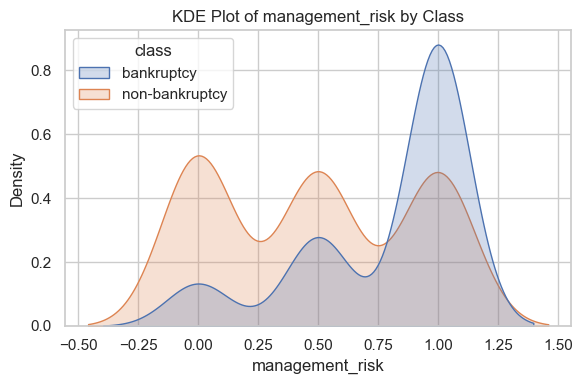

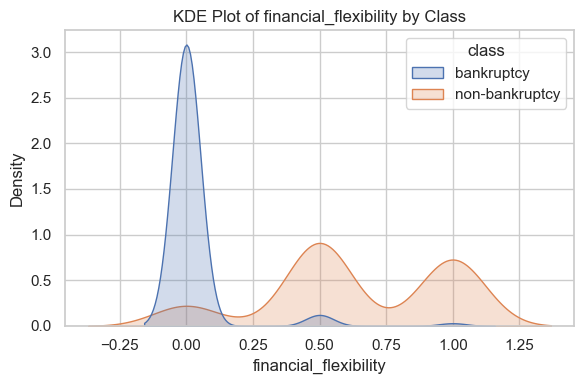

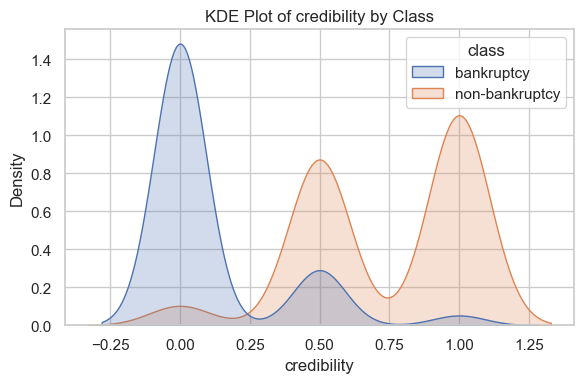

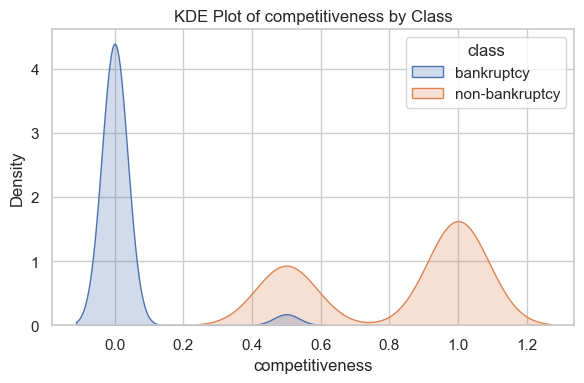

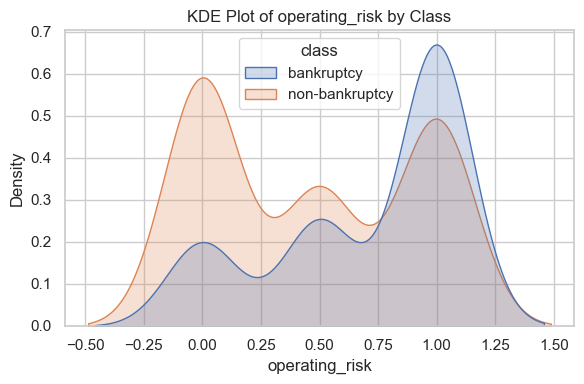

In [16]:
# These KDE plots show the distribution of each feature for bankruptcy vs non-bankruptcy companies, 
# helping to identify which features separate the classes most clearly.
for col in features:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=col, hue='class', fill=True)
    plt.title(f"KDE Plot of {col} by Class")
    plt.tight_layout()
    plt.show()

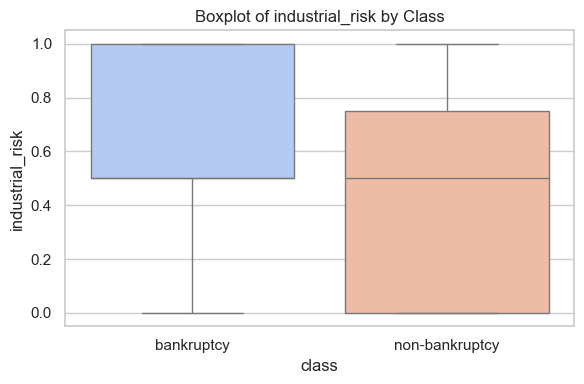

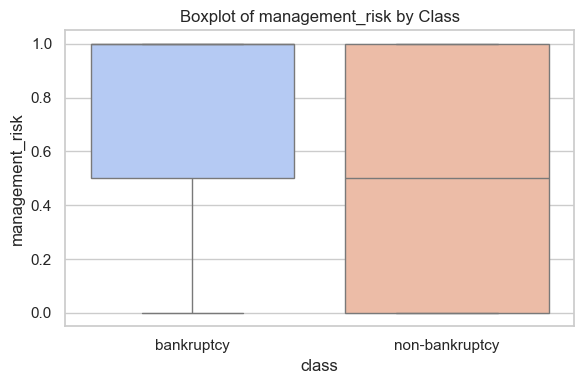

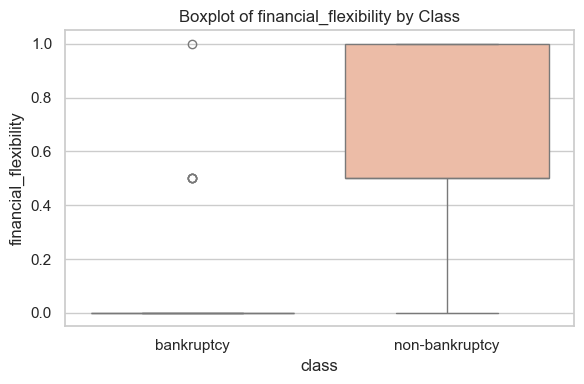

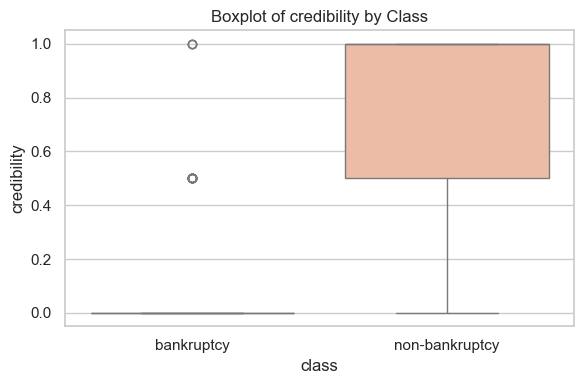

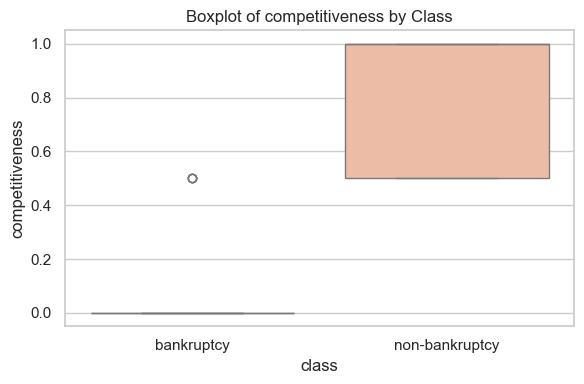

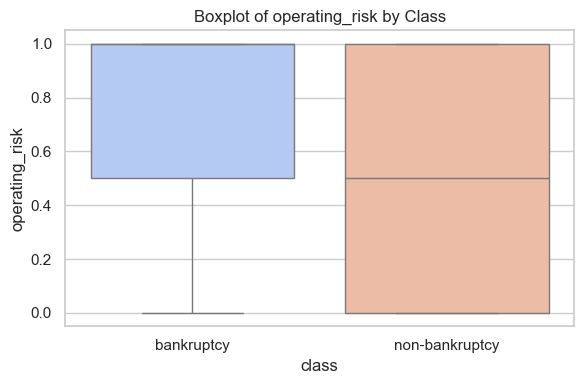

In [17]:
#Boxplot of All features by Class
# The boxplots show the spread and central tendency of each feature for bankruptcy vs non-bankruptcy companies, 
# highlighting differences between classes and potential outliers in the data.
for col in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='class', y=col, data=df,palette="coolwarm")
    plt.title(f"Boxplot of {col} by Class")
    plt.tight_layout()
    plt.show()

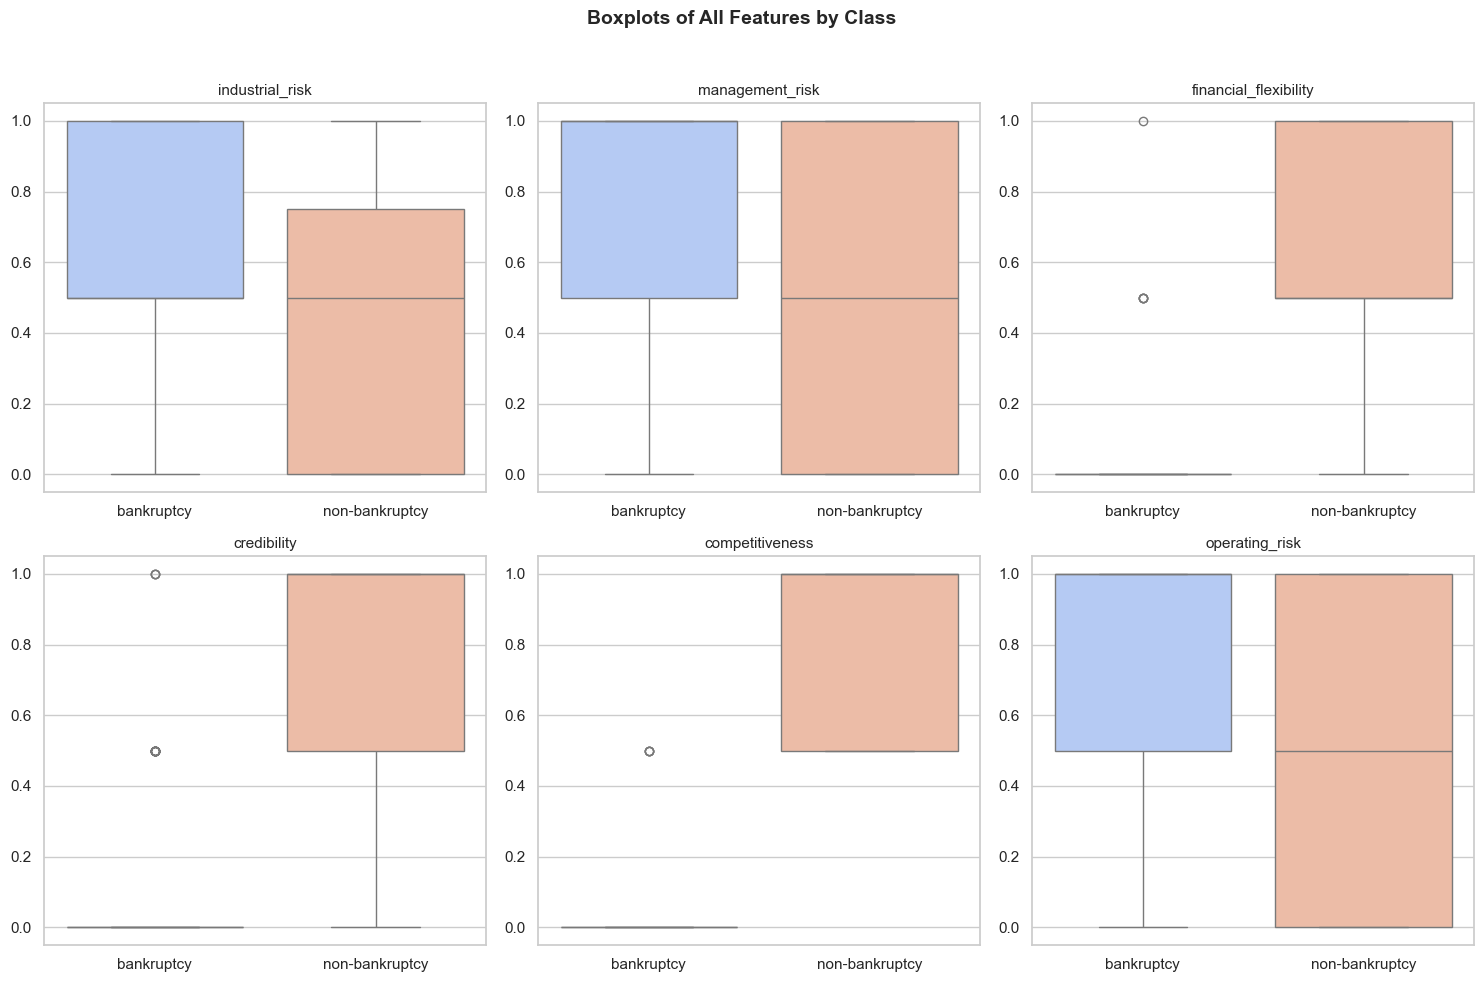

In [18]:
# Boxplots of All Features by Class — Single Page Version
# ---------------------------------------------------------
plt.figure(figsize=(15, 10))  # Adjust size as per number of features
for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)  # 2 rows × 3 columns grid (change if features > 6)
    sns.boxplot(x='class', y=col, data=df, palette="coolwarm")
    plt.title(f"{col}", fontsize=11)
    plt.xlabel("")
    plt.ylabel("")
plt.suptitle("Boxplots of All Features by Class", fontsize=14, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


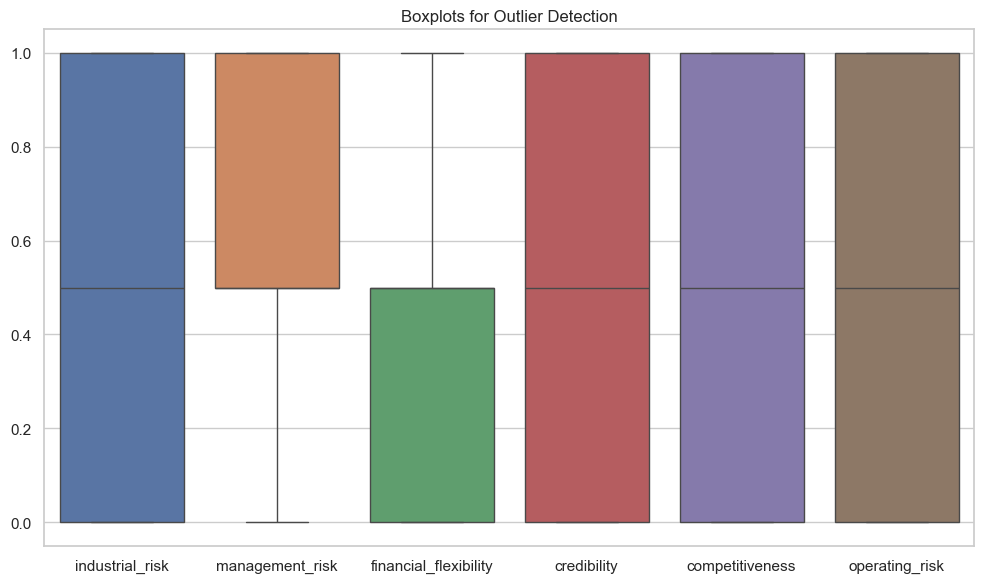

In [19]:
##Boxplots for Outlier Detection
# The combined boxplots for all features provide a quick overview of the distributions, 
# allowing us to detect outliers, skewness, and variability across all features simultaneously.
plt.figure(figsize=(10,6))
sns.boxplot(data=df[features])
plt.title("Boxplots for Outlier Detection")
plt.tight_layout()
plt.show()

In [20]:
#Outlier & Distribution Summary
# It provides a quick way to assess which features may be skewed, have extreme values, or require transformation before modeling.
from scipy.stats import skew, kurtosis
print("Outlier & Distribution Summary")
dist_summary = []
for col in features:
    dist_summary.append({
        'Feature': col,
        'Skewness': round(skew(df[col]), 3),
        'Kurtosis': round(kurtosis(df[col]), 3),
        'Unique Values': df[col].nunique(),
        'Most Frequent': df[col].mode()[0],
        'Outlier Count (IQR)': ((df[col] > (df[col].quantile(0.75) + 1.5*(df[col].quantile(0.75)-df[col].quantile(0.25)))) |
                                (df[col] < (df[col].quantile(0.25) - 1.5*(df[col].quantile(0.75)-df[col].quantile(0.25))))).sum()
    })
dist_summary_df = pd.DataFrame(dist_summary)
display(dist_summary_df)

Outlier & Distribution Summary


,Feature,Skewness,Kurtosis,Unique Values,Most Frequent,Outlier Count (IQR)
0,industrial_risk,-0.067,-1.515,3,1.0,0
1,management_risk,-0.442,-1.375,3,1.0,0
2,financial_flexibility,0.476,-1.289,3,0.0,0
3,credibility,0.112,-1.539,3,0.0,0
4,competitiveness,0.093,-1.701,3,0.0,0
5,operating_risk,-0.274,-1.616,3,1.0,0


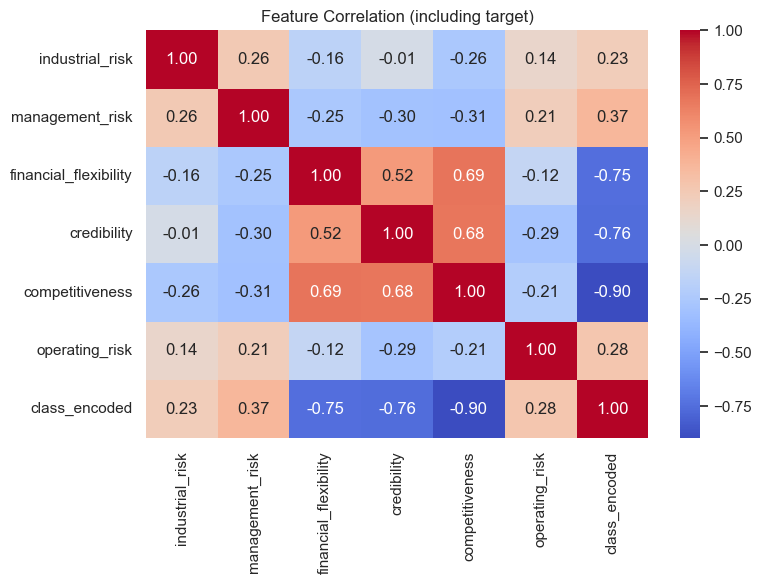

In [21]:
#Feature Correlation (including target)
#The heatmap visualizes the correlation coefficients between all features and the target, 
# showing which features are positively or negatively associated with bankruptcy or non-bankruptcy.
numeric_df = df[features + ['class_encoded']]
corr = numeric_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation (including target)")
plt.tight_layout()
plt.show()

In [22]:
#Correlation of features with target:
# The printed correlation values show how strongly each feature is linearly related to the target, 
# helping identify the most influential predictors for bankruptcy vs non-bankruptcy.
print("Correlation of features with target:")
print(corr['class_encoded'].sort_values(ascending=False))

Correlation of features with target:
class_encoded            1.000000
management_risk          0.370838
operating_risk           0.279786
industrial_risk          0.227823
financial_flexibility   -0.751020
credibility             -0.755909
competitiveness         -0.899452
Name: class_encoded, dtype: float64


In [23]:
#Variance Inflation Factor (VIF)
# The VIF table measures multicollinearity between features; 
# high VIF (>5 or 10) indicates a feature is highly correlated with others and may cause redundancy in models.
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[features].astype(float).copy()
vif_data = pd.DataFrame({
    "feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
})

In [24]:
#To Show VIF (Variance Inflation Factor)
print("VIF (Variance Inflation Factor)")
display(vif_data.sort_values('VIF', ascending=False))

VIF (Variance Inflation Factor)


,feature,VIF
4,competitiveness,5.710254
3,credibility,4.571150
2,financial_flexibility,3.615472
1,management_risk,2.898836
0,industrial_risk,2.861285
5,operating_risk,2.523834


In [25]:
# Chi-Squared test
# The Chi-Squared test results show how strongly each categorical feature is associated with the target class, 
# with higher Chi2 values and low p-values indicating a significant relationship with bankruptcy vs non-bankruptcy.
from sklearn.feature_selection import chi2
X_chi = (df[features] * 2).astype(int)
y_chi = df['class_encoded'].astype(int)
chi_scores = chi2(X_chi, y_chi)
chi2_results = pd.DataFrame({
    'Feature': features,
    'Chi2 Statistic': chi_scores[0],
    'p-value': chi_scores[1]
}).sort_values('Chi2 Statistic', ascending=False)
print("Chi-Squared test results")
display(chi2_results)

Chi-Squared test results


,Feature,Chi2 Statistic,p-value
4,competitiveness,164.372504,1.254257e-37
2,financial_flexibility,120.474484,4.980325e-28
3,credibility,104.614502,1.483669e-24
1,management_risk,18.814380,1.440767e-05
5,operating_risk,12.916258,3.257404e-04
0,industrial_risk,8.450597,3.649237e-03


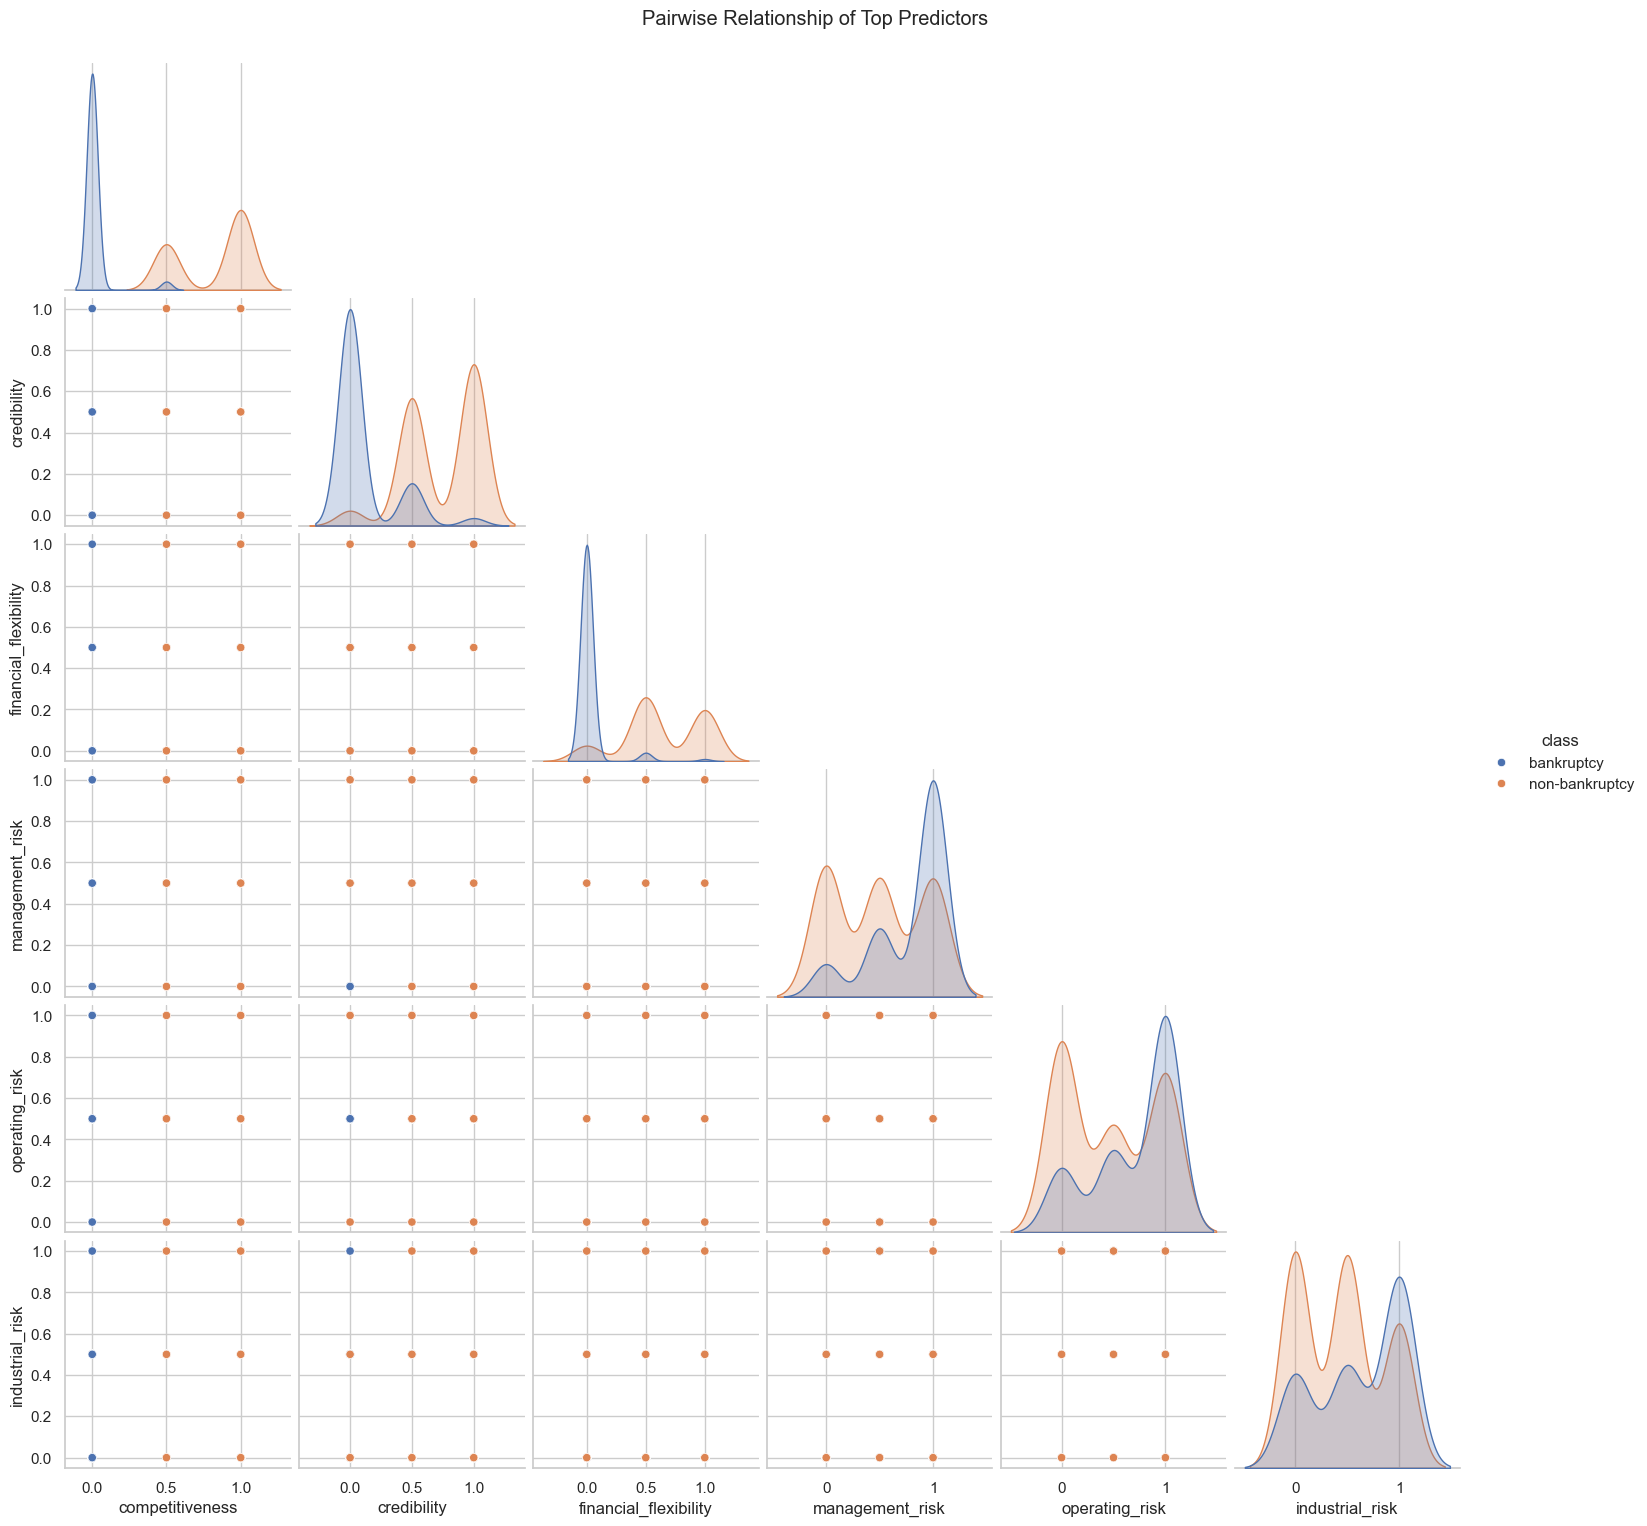

()

In [26]:
###Pairwise Relationship of Top Predictors
# Pairplot shows scatterplots and distributions for the top 6 features most correlated with the target, 
# allowing us to see both individual feature distributions and pairwise relationships between features by class.
top_corr = corr['class_encoded'].drop('class_encoded').abs().sort_values(ascending=False)
top_features = top_corr.head(6).index.tolist()
# Pairplot of these features
sns.pairplot(df[top_features + ['class']], hue='class',corner=True)
plt.suptitle("Pairwise Relationship of Top Predictors", y=1.02)
plt.show()
()

Logistic Regression Feature Importance


,Feature,Coefficient,Abs_Coefficient
4,competitiveness,-2.896807,2.896807
2,financial_flexibility,-1.547481,1.547481
3,credibility,-1.464529,1.464529
1,management_risk,0.396108,0.396108
0,industrial_risk,0.375988,0.375988
5,operating_risk,0.147424,0.147424


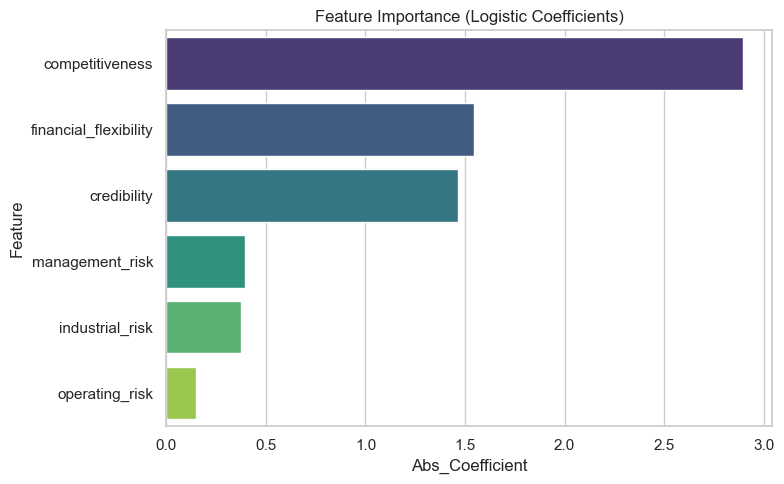

In [27]:
# Logistic Regression Feature Importance
## This code fits a logistic regression model to the scaled features and computes feature importance based on the model coefficients, 
# showing which features have the strongest impact on predicting bankruptcy higher coefficients = more influence.
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
#Standardizes features so they all have similar scale, which is important for logistic regression coefficients to be comparable.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
y = df['class_encoded']
#Learns how each feature contributes to predicting the target (class_encoded).
model = LogisticRegression()
model.fit(X_scaled, y)

importance_df = pd.DataFrame({
    'Feature': features,
    #Coefficient → shows direction and strength (positive = increases bankruptcy probability, negative = decreases)
    'Coefficient': model.coef_[0],
    #Abs_Coefficient → magnitude only, used for ranking features by importance
    'Abs_Coefficient': np.abs(model.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)
print("Logistic Regression Feature Importance")
display(importance_df)

# The barplot visualizes the absolute value of coefficients, making it easy to compare the relative importance of each feature.
plt.figure(figsize=(8,5))
sns.barplot(x='Abs_Coefficient', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance (Logistic Coefficients)")
plt.tight_layout()
plt.show()

In [28]:
# EDA Summary Table
eda_summary = pd.DataFrame({
    'EDA Step': [
        '1️⃣ Data Overview',
        '2️⃣ Descriptive Statistics',
        '3️⃣ Boxplots (Outlier Detection)',
        '4️⃣ Correlation Heatmap',
        '5️⃣ Correlation with Target',
        '6️⃣ Variance Inflation Factor (VIF)'
    ],
    'Objective': [
        'Check dataset size, data types & missing values',
        'Understand central tendency & spread of variables',
        'Identify outliers and variable ranges',
        'Explore inter-feature & target relationships',
        'Find key predictors positively/negatively correlated with bankruptcy',
        'Detect multicollinearity among independent variables'
    ],
    'Key Insight': [
        'No missing values, all features are numerical',
        'Features vary between low and high risk levels',
        'Few mild outliers but within acceptable range',
        'Competitiveness and credibility negatively correlated with bankruptcy',
        'Management risk and operating risk increase bankruptcy chance',
        'All VIF < 5 — no severe multicollinearity detected'
    ]
})

# Display neatly
print("📊 EDA Summary Table:")
display(eda_summary.style.background_gradient(cmap='Blues').set_properties(**{
    'border': '1px solid gray',
    'text-align': 'left'
}))


📊 EDA Summary Table:


,EDA Step,Objective,Key Insight
0,1️⃣ Data Overview,"Check dataset size, data types & missing values","No missing values, all features are numerical"
1,2️⃣ Descriptive Statistics,Understand central tendency & spread of variables,Features vary between low and high risk levels
2,3️⃣ Boxplots (Outlier Detection),Identify outliers and variable ranges,Few mild outliers but within acceptable range
3,4️⃣ Correlation Heatmap,Explore inter-feature & target relationships,Competitiveness and credibility negatively correlated with bankruptcy
4,5️⃣ Correlation with Target,Find key predictors positively/negatively correlated with bankruptcy,Management risk and operating risk increase bankruptcy chance
5,6️⃣ Variance Inflation Factor (VIF),Detect multicollinearity among independent variables,All VIF < 5 — no severe multicollinearity detected


In [29]:
                                        #### “Bankruptcy Prevention –  Model Buliding” ####
# This code splits the dataset into training (80%) and testing (20%) sets while preserving the class distribution using stratification, 
# preparing the data for model training and evaluation.
# The print statements display the number of samples in each set, helping to confirm that the split was done correctly.
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay, roc_curve, auc)
from sklearn.preprocessing import StandardScaler
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples : {X_test.shape[0]}")

Training samples: 200
Testing samples : 50


Accuracy: 1.0

Classification Report:


,precision,recall,f1-score,support
0,1.0,1.0,1.0,29.0
1,1.0,1.0,1.0,21.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,50.0
weighted avg,1.0,1.0,1.0,50.0


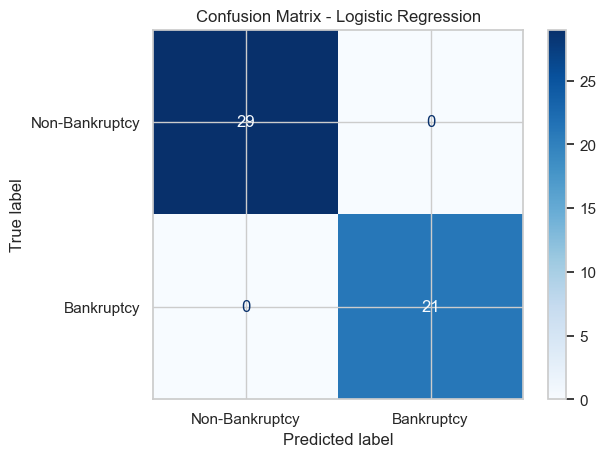

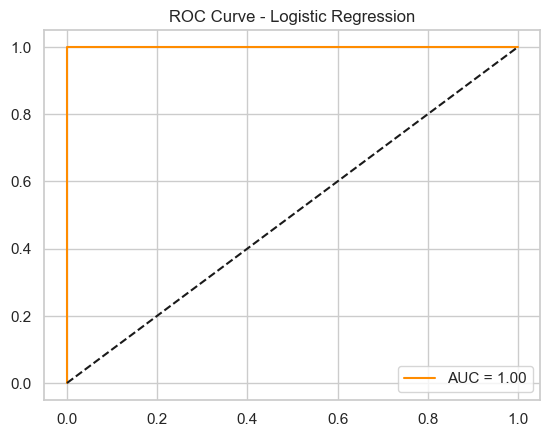

Feature Importance:
                  Feature  Coefficient  Importance
4        competitiveness    -3.768004    3.768004
3            credibility    -2.307379    2.307379
2  financial_flexibility    -2.274351    2.274351
1        management_risk     0.895581    0.895581
0        industrial_risk     0.559694    0.559694
5         operating_risk     0.310319    0.310319


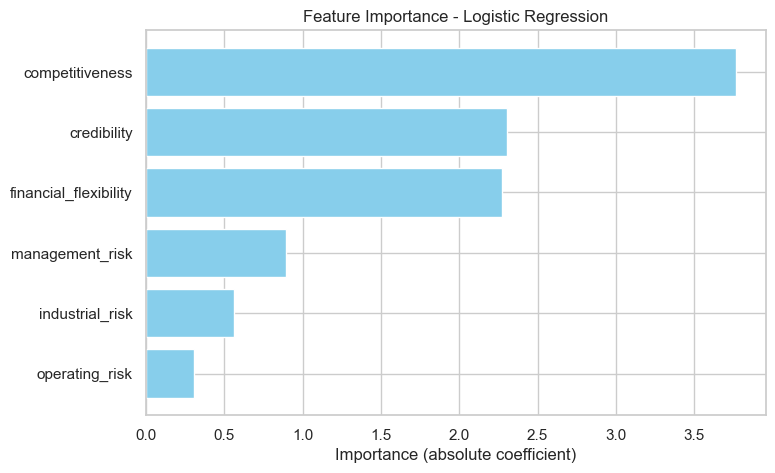

In [30]:
#Logistic Regression Model Evaluation
## Evaluates how well the logistic regression model predicts bankruptcy on unseen data using accuracy, confusion matrix, and ROC curve.
# Focuses on model performance rather than interpreting which features are important.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
# Create a well-aligned classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

print("\nClassification Report:")
display(report_df) 
cm = confusion_matrix(y_test, y_pred)

#Confusion Matrix - Logistic Regression
ConfusionMatrixDisplay(cm, display_labels=["Non-Bankruptcy", "Bankruptcy"]).plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

#ROC Curve - Logistic Regression
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()
# Feature Importance
importance = pd.DataFrame({
    'Feature': X_train.columns,
    #Coefficient: signed value (+/-)
    'Coefficient': model.coef_[0],
    #Importance: absolute value (how strong the feature influences prediction)
    'Importance': np.abs(model.coef_[0])
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", importance)
#This Plot Showwhich factors are most important in predicting bankruptcy.
# Plot Feature Importance
plt.figure(figsize=(8,5))
plt.barh(importance['Feature'], importance['Importance'], color='skyblue')
plt.xlabel("Importance (absolute coefficient)")
plt.title("Feature Importance - Logistic Regression")
plt.gca().invert_yaxis()
plt.show()

Accuracy: 0.98
Classification Report:


,precision,recall,f1-score,support
0,1.000000,0.965517,0.982456,29.00
1,0.954545,1.000000,0.976744,21.00
accuracy,0.980000,0.980000,0.980000,0.98
macro avg,0.977273,0.982759,0.979600,50.00
weighted avg,0.980909,0.980000,0.980057,50.00


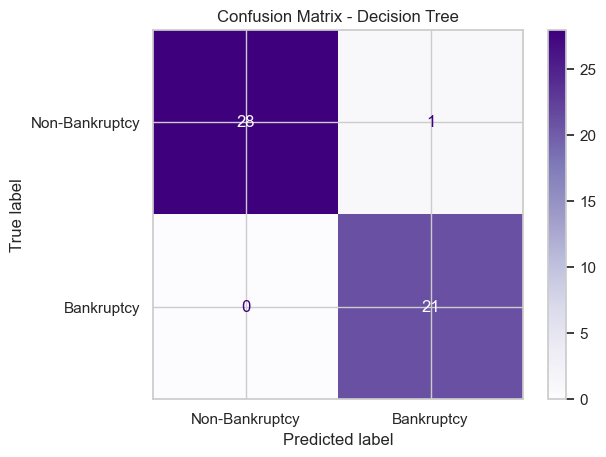

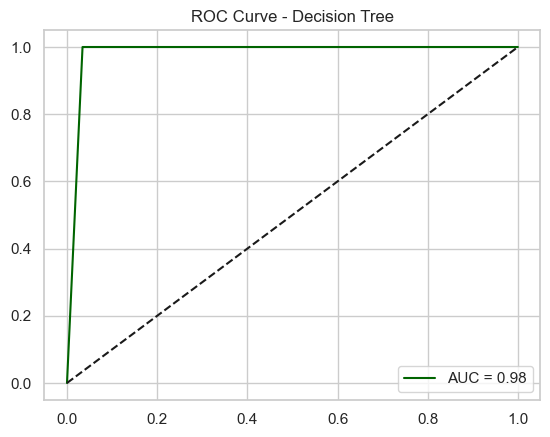

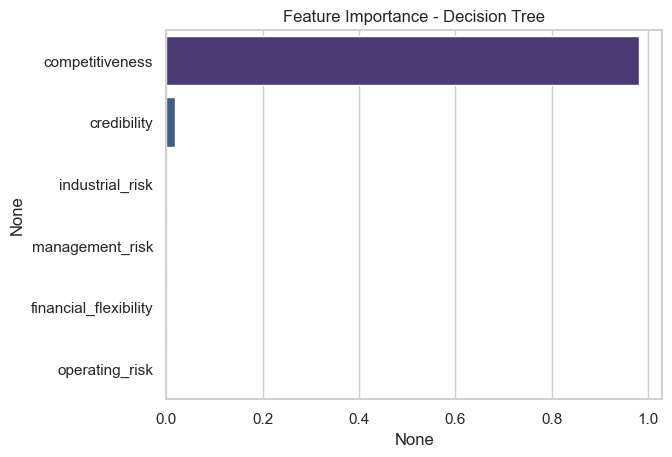

In [31]:
#Decision Tree Classifier
# A simple and interpretable model that splits data based on feature thresholds.
# We use it to understand feature-level decision paths and identify important predictors of bankruptcy.
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

print("Classification Report:")
display(report_df) 

###Confusion Matrix of Decision Tree Classifier
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Non-Bankruptcy", "Bankruptcy"]).plot(cmap='Purples')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

#ROC Curve - Decision Tree
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.2f}", color='darkgreen')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()
fpr, tpr, _ = roc_curve(y_test, y_proba)

# Feature Importance
# This code visualizes which features contribute most to the Decision Tree's predictions.
# Higher importance means the feature is more influential in splitting the data to predict bankruptcy.
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feat_imp, y=feat_imp.index, palette='viridis')
plt.title("Feature Importance - Decision Tree")
plt.show()

Accuracy: 1.0
Classification Report:


,precision,recall,f1-score,support
0,1.0,1.0,1.0,29.0
1,1.0,1.0,1.0,21.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,50.0
weighted avg,1.0,1.0,1.0,50.0


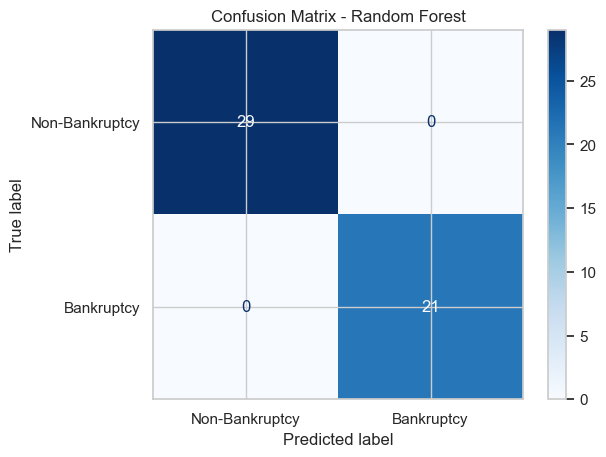

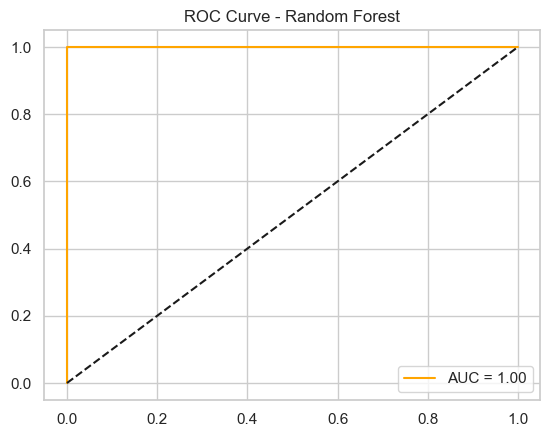

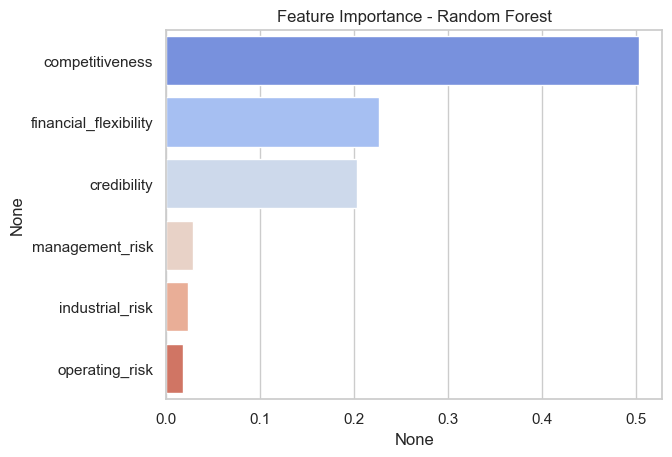

In [32]:
#Random Forest Classifier
# An ensemble of multiple decision trees that improves prediction stability and accuracy.
# We use it to reduce overfitting and check if combining trees gives better performance than a single tree.
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

print("Classification Report:")
display(report_df)
#Confusion Matrix - Random Forest
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Non-Bankruptcy", "Bankruptcy"]).plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

#ROC Curve - Random Forest
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.2f}", color='orange')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

# Feature Importance
# Shows which features the Random Forest model considers most influential in predicting bankruptcy.
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feat_imp, y=feat_imp.index, palette='coolwarm')
plt.title("Feature Importance - Random Forest")
plt.show()

Accuracy: 1.0
Classification Report:


,precision,recall,f1-score,support
0,1.0,1.0,1.0,29.0
1,1.0,1.0,1.0,21.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,50.0
weighted avg,1.0,1.0,1.0,50.0


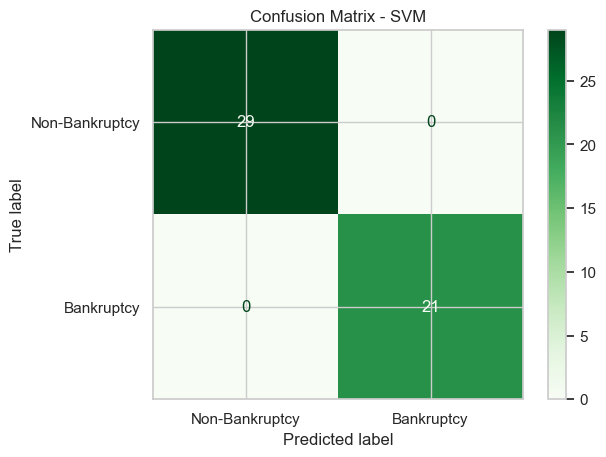

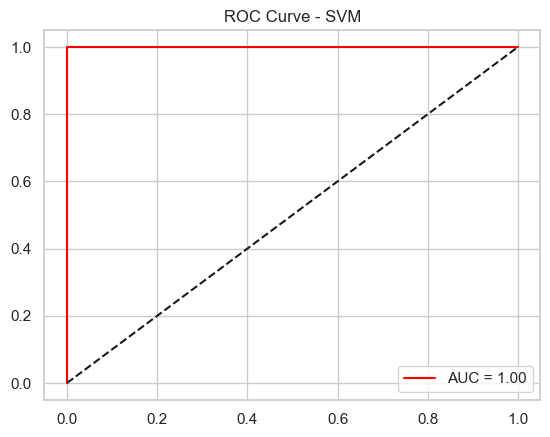

In [33]:
#Support Vector Machine (SVM)
# A powerful model that separates classes using the optimal hyperplane.
# We use it to test how well a margin-based classifier can distinguish bankruptcy vs. non-bankruptcy.
from sklearn.svm import SVC

model = SVC(probability=True, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

print("Classification Report:")
display(report_df)
#Confusion Matrix - SVM
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Non-Bankruptcy", "Bankruptcy"]).plot(cmap='Greens')
plt.title("Confusion Matrix - SVM")
plt.show()

#ROC Curve of SVM
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.2f}", color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()

Accuracy: 1.0
Classification Report:


,precision,recall,f1-score,support
0,1.0,1.0,1.0,29.0
1,1.0,1.0,1.0,21.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,50.0
weighted avg,1.0,1.0,1.0,50.0


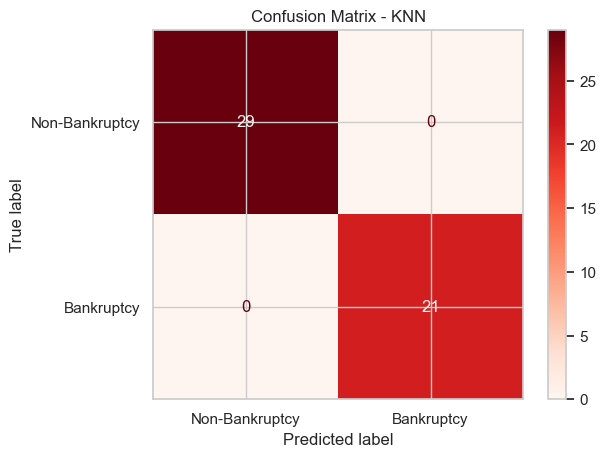

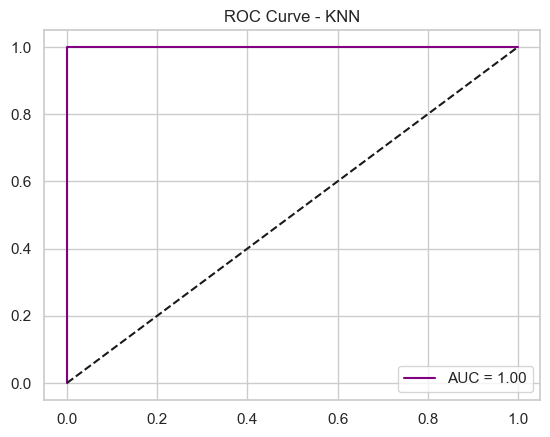

Feature Importance (Permutation):
                  Feature  Importance
4        competitiveness       0.162
2  financial_flexibility       0.058
3            credibility       0.052
5         operating_risk       0.034
0        industrial_risk       0.010
1        management_risk       0.000


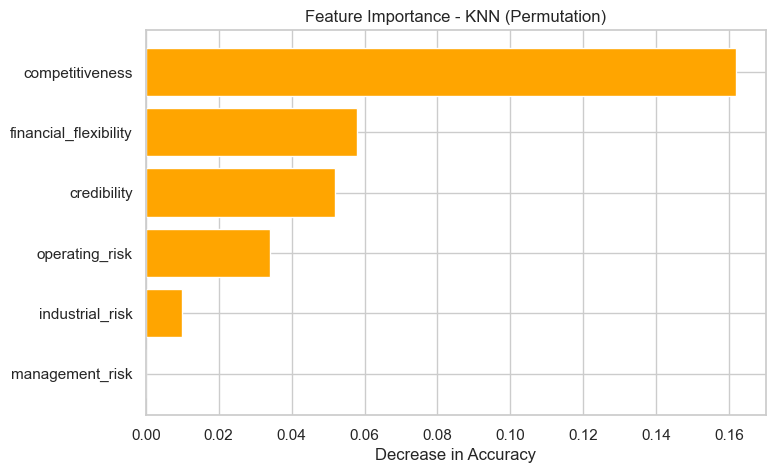

In [34]:
# K-Nearest Neighbors (KNN)
# A distance-based algorithm that classifies data based on neighboring samples.
# We use it to test how instance-based learning performs compared to tree or margin-based models.
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

print("Classification Report:")
display(report_df)
#onfusion Matrix - KNN
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Non-Bankruptcy", "Bankruptcy"]).plot(cmap='Reds')
plt.title("Confusion Matrix - KNN")
plt.show()
#ROC Curve - KNN
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.2f}", color='purple')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - KNN")
plt.legend()
plt.show()
from sklearn.inspection import permutation_importance
#Permutation Feature Importance
# Permutation = randomly shuffling a feature to see how much it affects model accuracy
# This shows which features most influence the KNN model by measuring how shuffling each feature decreases accuracy
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)
print("Feature Importance (Permutation):\n", importance_df)
#Plot Feature Importance
plt.figure(figsize=(8,5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='orange')
plt.xlabel("Decrease in Accuracy")
plt.title("Feature Importance - KNN (Permutation)")
plt.gca().invert_yaxis()
plt.show()

Accuracy: 0.98
Classification Report:


,precision,recall,f1-score,support
0,1.000000,0.965517,0.982456,29.00
1,0.954545,1.000000,0.976744,21.00
accuracy,0.980000,0.980000,0.980000,0.98
macro avg,0.977273,0.982759,0.979600,50.00
weighted avg,0.980909,0.980000,0.980057,50.00


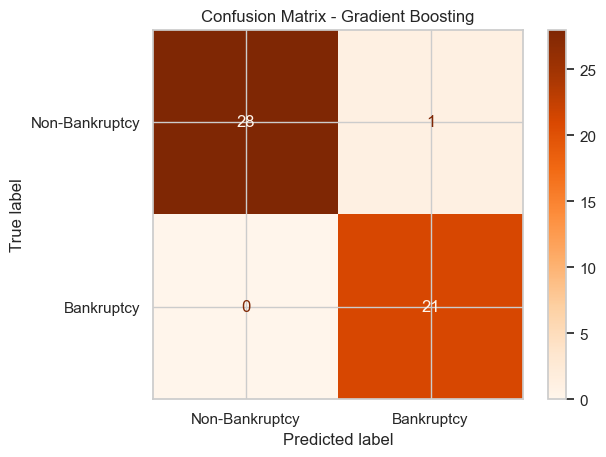

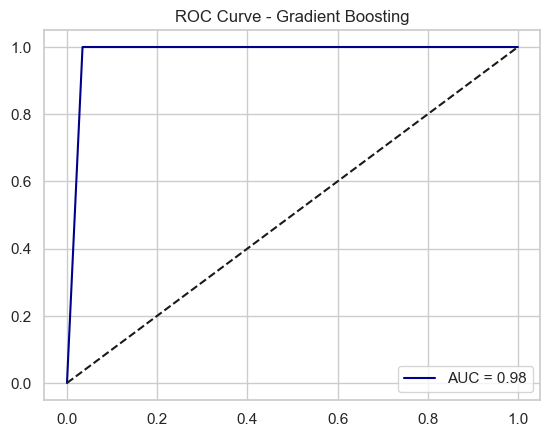

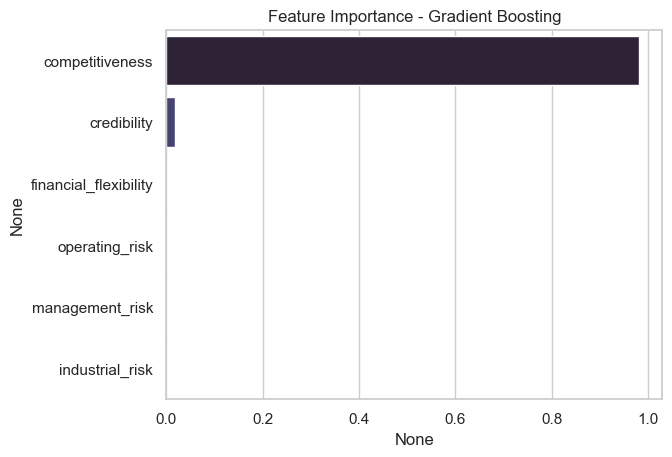

In [35]:
# Gradient Boosting Classifier
# A boosting algorithm that builds models sequentially, correcting previous errors.
# We use it to check if boosting weak learners can outperform Random Forest in accuracy and AUC.
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

print("Classification Report:")
display(report_df)
#Confusion Matrix - Gradient Boosting
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Non-Bankruptcy", "Bankruptcy"]).plot(cmap='Oranges')
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

#ROC Curve - Gradient Boosting
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.2f}", color='darkblue')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Gradient Boosting")
plt.legend()
plt.show()

# Feature Importance
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feat_imp, y=feat_imp.index, palette='mako')
plt.title("Feature Importance - Gradient Boosting")
plt.show()

Accuracy: 1.0
Classification Report:


,precision,recall,f1-score,support
0,1.0,1.0,1.0,29.0
1,1.0,1.0,1.0,21.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,50.0
weighted avg,1.0,1.0,1.0,50.0


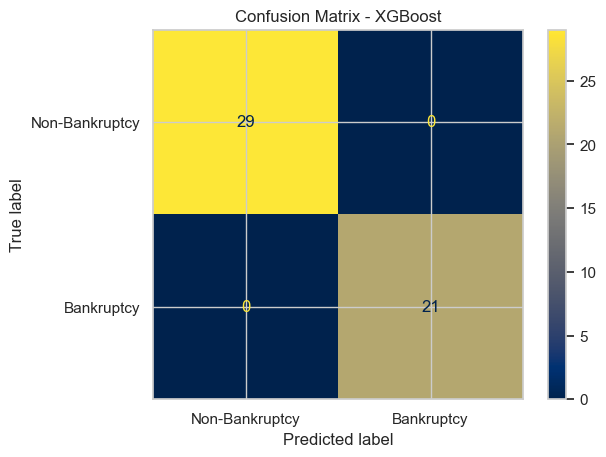

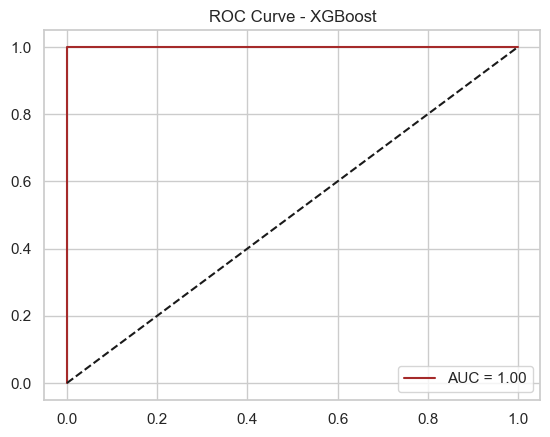

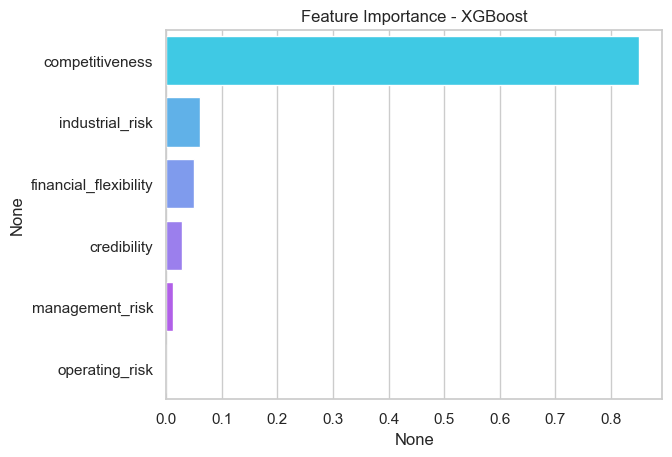

In [36]:
#XGBoost Classifier (Extreme Gradient Boosting)
# An optimized boosting algorithm known for high speed and performance.
# We use it to achieve potentially higher accuracy and faster training compared to other ensemble methods.

from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

print("Classification Report:")
display(report_df)
#Confusion Matrix - XGBoost
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Non-Bankruptcy", "Bankruptcy"]).plot(cmap='cividis')
plt.title("Confusion Matrix - XGBoost")
plt.show()
#ROC Curve - XGBoost
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.2f}", color='brown')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()
#Feature Importance - XGBoost
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feat_imp, y=feat_imp.index, palette='cool')
plt.title("Feature Importance - XGBoost")
plt.show()

In [37]:
# Model Comparison Chart
# After training all models, we compare their accuracy to find the best performer.
# If you ran all models, store their accuracies manually
# Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost" : XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [38]:
results = []
for name, model in models.items():
    print(f"Training {name}")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    cv = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
    cm = confusion_matrix(y_test, y_pred)

    roc_auc = auc(*roc_curve(y_test, y_proba)[:2]) if y_proba is not None else None

    print(f"Accuracy: {acc:.4f} | CV Score: {cv:.4f} | AUC: {roc_auc:.4f}" if roc_auc else f"Accuracy: {acc:.4f} | CV Score: {cv:.4f}")
    results.append({
        'Model': name,
        'Accuracy': acc,
        'CV Score': cv,
        'AUC': roc_auc
    })

Training Logistic Regression
Accuracy: 1.0000 | CV Score: 0.9960 | AUC: 1.0000
Training Decision Tree
Accuracy: 0.9800 | CV Score: 0.9920 | AUC: 0.9828
Training Random Forest
Accuracy: 1.0000 | CV Score: 1.0000 | AUC: 1.0000
Training SVM
Accuracy: 1.0000 | CV Score: 0.9960 | AUC: 1.0000
Training KNN
Accuracy: 1.0000 | CV Score: 0.9960 | AUC: 1.0000
Training Gradient Boosting
Accuracy: 0.9800 | CV Score: 0.9800 | AUC: 0.9828
Training XGBoost
Accuracy: 1.0000 | CV Score: 0.9960 | AUC: 1.0000


In [39]:
# Convert results list into DataFrame first
results_df = pd.DataFrame(results)

# Apply styling for professional look
table = (
    results_df.style
    .background_gradient(subset=['Accuracy', 'CV Score', 'AUC'], cmap='Blues')
    .set_properties(**{'text-align': 'center', 'font-weight': 'bold'})
    .set_caption("Model Performance Comparison")
)

# Display styled table
display(table)


,Model,Accuracy,CV Score,AUC
0,Logistic Regression,1.000000,0.996000,1.000000
1,Decision Tree,0.980000,0.992000,0.982759
2,Random Forest,1.000000,1.000000,1.000000
3,SVM,1.000000,0.996000,1.000000
4,KNN,1.000000,0.996000,1.000000
5,Gradient Boosting,0.980000,0.980000,0.982759
6,XGBoost,1.000000,0.996000,1.000000


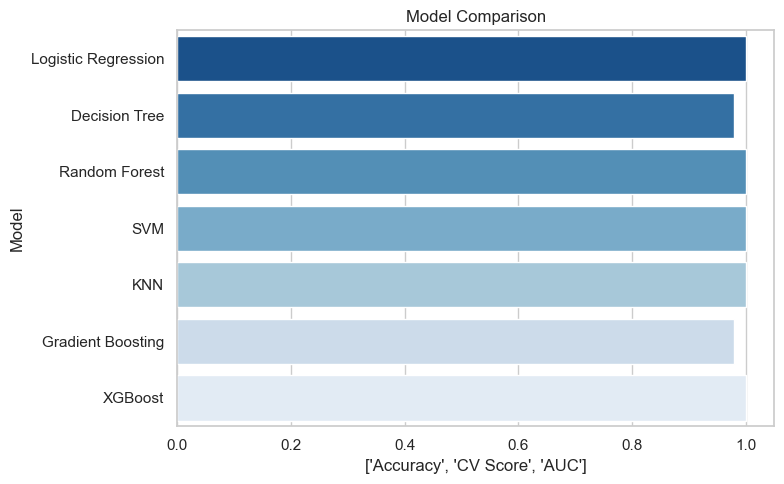

In [40]:
#Visualize Model Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='Blues_r')
plt.title('Model Comparison')
plt.xlabel(['Accuracy', 'CV Score', 'AUC'])
plt.ylabel('Model')
plt.tight_layout()
plt.show()

 Best Performing Model: Random Forest


Classification Report - Random Forest


,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,29.000000
1,1.000000,1.000000,1.000000,21.000000
accuracy,1.000000,1.000000,1.000000,1.000000
macro avg,1.000000,1.000000,1.000000,50.000000
weighted avg,1.000000,1.000000,1.000000,50.000000


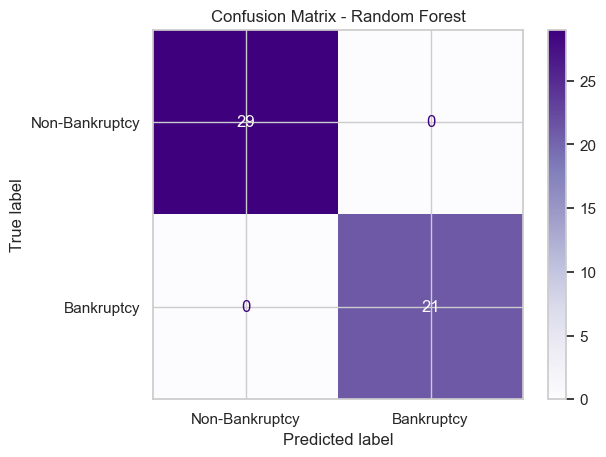

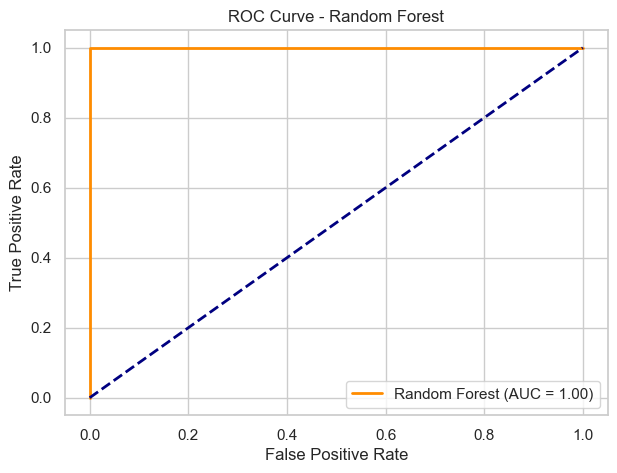

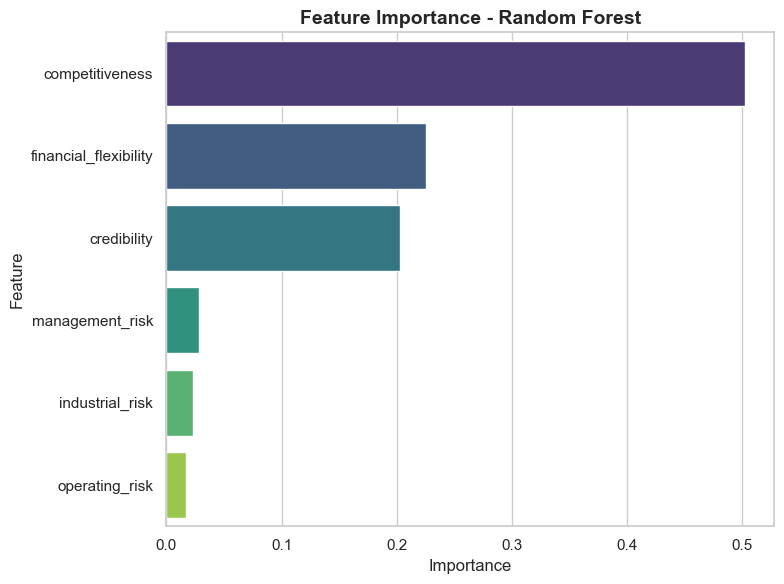


 Final Model Performance Summary:


,Model,Accuracy,CV Score,AUC
2,Random Forest,1.000000,1.000000,1.000000
0,Logistic Regression,1.000000,0.996000,1.000000
3,SVM,1.000000,0.996000,1.000000
4,KNN,1.000000,0.996000,1.000000
6,XGBoost,1.000000,0.996000,1.000000
1,Decision Tree,0.980000,0.992000,0.982759
5,Gradient Boosting,0.980000,0.980000,0.982759


In [41]:

# Best Model Selection & Evaluation
results_df = results_df.sort_values(by=['AUC', 'CV Score', 'Accuracy'], ascending=False)
# Identify Best Model
best_model_name = results_df.iloc[0]['Model']
print(f" Best Performing Model: {best_model_name}\n")
best_model = models[best_model_name]

# Predictions
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

# Classification Report
print(f"\nClassification Report - {best_model_name}")
display(
    report_df.style
    .background_gradient(cmap='YlGnBu', subset=['precision', 'recall', 'f1-score', 'support'])
    .set_properties(**{'text-align': 'center', 'font-weight': 'bold'})
    .set_caption(f"Performance Metrics - {best_model_name}")
)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Bankruptcy", "Bankruptcy"])
disp.plot(cmap='Purples')
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()
# ROC Curve
if y_pred_proba_best is not None:
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba_best)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'{best_model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {best_model_name}')
    plt.legend(loc="lower right")
    plt.show()
# Feature Importance
importance_df = None

# Tree-based models
if hasattr(best_model, "feature_importances_"):
    importances = best_model.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

# Linear models (like Logistic Regression)
elif hasattr(best_model, "coef_"):
    importances = np.abs(best_model.coef_[0])
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

# Plot if available
if importance_df is not None:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title(f'Feature Importance - {best_model_name}', fontsize=14, fontweight='bold')
    plt.xlabel("Importance", fontsize=12)
    plt.ylabel("Feature", fontsize=12)
    plt.tight_layout()
    plt.show()

# Final Summary Table
print("\n Final Model Performance Summary:")
display(
    results_df.style
    .background_gradient(subset=['Accuracy', 'CV Score', 'AUC'], cmap='Blues')
    .set_properties(**{'text-align': 'center', 'font-weight': 'bold'})
    .set_caption("Best Model Performance Comparison")
)


In [42]:
                        ####Model Tuning & Optimization####
#To improve model performance by adjusting hyperparameters and reducing overfitting or underfitting.

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 1.0


In [43]:
!pip install shap


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


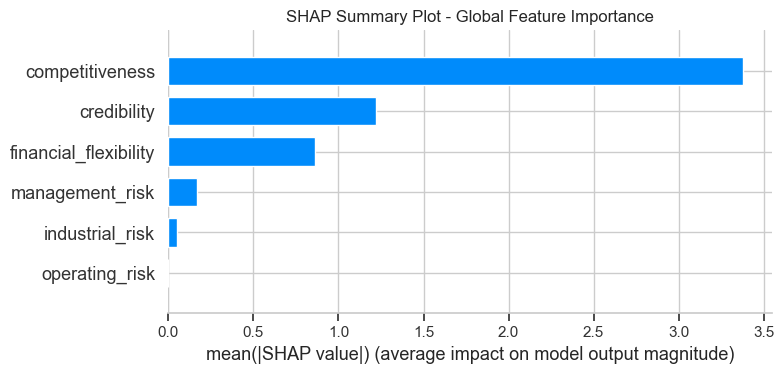

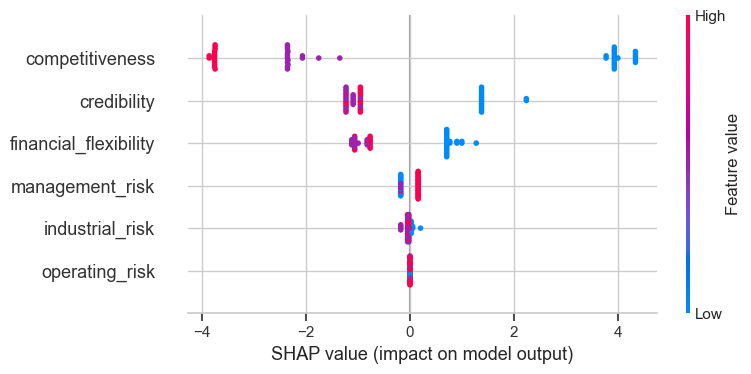

In [44]:
                  ###Model Interpretation###
#To understand why The model makes certain predictions — especially important for business and domain understanding.

#LINE 1 - SHAP library, which is used for model interpretability.
#It helps you understand your trained model — not just what it predicts, but why it predicts that way.
#LINE 2 - Creating a SHAP explainer object for your trained model.
#TreeExplainer is specifically designed for tree-based models (like Random Forest, XGBoost, Gradient Boosting, Decision Tree).
#This explainer learns how the model makes predictions internally.
#LINE 3 - Calculates SHAP values for each feature in your test data.
#How much a specific feature increased or decreased the prediction for a given instance (company).
#LINE 4 - Creates a visual summary of feature importance and direction.
#The x-axis = SHAP value (impact on prediction).
#The color = feature value (high or low).
#Each dot = one observation (company).
#Features are sorted by importance (top = most important).
#The plot visually tells you which features matter the most and how they affect bankruptcy outcome
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Shows the overall strength of each feature's impact on predictions
plt.title("SHAP Summary Plot - Global Feature Importance")
shap.summary_plot(shap_values, X_test, plot_type="bar", show=True)
plt.show()

# Visualizes how high or low values of features influence predictions
shap.summary_plot(shap_values, X_test)

In [45]:
####Model Saving
#To save your trained model so you can reuse it without retraining every time
import pickle

with open("Bankruptcy_Model_Final.pkl", "wb") as f:
    pickle.dump(model, f)